In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler

In [ ]:

# Mengkoneksikan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

path = "/content/gdrive/MyDrive/DATASET/"

In [ ]:

# Membuat dataframe dan memanggil file
df = pd.read_csv(path + '5000_Movies.csv')
df

,id,budget,genres,original_title,popularity,production_companies,revenue,original_language
0,19995,237000000.0,Action,Avatar,150.437577,name: Ingenious Film Partners,2.787965e+09,en
1,285,300000000.0,Adventure,Pirates of the Caribbean: At World's End,139.082615,name: Walt Disney Pictures,9.610000e+08,en
2,206647,245000000.0,Action,Spectre,107.376788,name: Columbia Pictures,8.806746e+08,en
3,49026,250000000.0,Action,The Dark Knight Rises,112.312950,name: Legendary Pictures,1.084939e+09,en
4,49529,260000000.0,Action,John Carter,43.926995,name: Walt Disney Pictures,2.841391e+08,en
...,...,...,...,...,...,...,...,...
4798,9367,220000.0,Action,El Mariachi,14.269792,name: Columbia Pictures,2.040920e+06,es
4799,72766,9000.0,Comedy,Newlyweds,0.642552,name : Walt Disney Pictures,0.000000e+00,en
4800,231617,0.0,Comedy,"Signed, Sealed, Delivered",1.444476,name: Front Street Pictures,0.000000e+00,en
4801,126186,0.0,TV Movie,Shanghai Calling,0.857008,name : Walt Disney Pictures,0.000000e+00,en


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   budget                4803 non-null   float64
 2   genres                4803 non-null   object 
 3   original_title        4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   revenue               4803 non-null   float64
 7   original_language     4803 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 300.3+ KB


In [ ]:
df.describe()

,id,budget,popularity,revenue
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03
mean,57165.484281,2.904504e+07,21.492301,8.226064e+07
std,88694.614033,4.072239e+07,31.816650,1.628571e+08
min,5.000000,0.000000e+00,0.000000,0.000000e+00
25%,9014.500000,7.900000e+05,4.668070,0.000000e+00
50%,14629.000000,1.500000e+07,12.921594,1.917000e+07
75%,58610.500000,4.000000e+07,28.313505,9.291719e+07
max,459488.000000,3.800000e+08,875.581305,2.787965e+09


In [ ]:

# Mencari nilai yang hilang
print("Missing Values:\n")
print(df.isnull().sum())

Missing Values:

id                      0
budget                  0
genres                  0
original_title          0
popularity              0
production_companies    0
revenue                 0
original_language       0
dtype: int64


In [ ]:

# Menampilkan data setelah di cleaning
print("Data setelah di cleaning\n")
df_cleaned = df.drop_duplicates().reset_index(drop=True)
print(df_cleaned.head())


Data setelah di cleaning

       id       budget     genres                            original_title  \
0   19995  237000000.0     Action                                    Avatar   
1     285  300000000.0  Adventure  Pirates of the Caribbean: At World's End   
2  206647  245000000.0     Action                                   Spectre   
3   49026  250000000.0     Action                     The Dark Knight Rises   
4   49529  260000000.0     Action                               John Carter   

   popularity           production_companies       revenue original_language  
0  150.437577  name: Ingenious Film Partners  2.787965e+09                en  
1  139.082615     name: Walt Disney Pictures  9.610000e+08                en  
2  107.376788        name: Columbia Pictures  8.806746e+08                en  
3  112.312950       name: Legendary Pictures  1.084939e+09                en  
4   43.926995     name: Walt Disney Pictures  2.841391e+08                en  


In [ ]:

# Mencari nilai minimal, maksimal dan rata-rata pada kolom popularity
min_likes = df_cleaned['popularity'].min()
max_likes = df_cleaned['popularity'].max()
mean_likes = df_cleaned['popularity'].mean()

print(f"popularity:\n- Min: {min_likes}, \n- Max: {max_likes}, \n- Rata-rata: {mean_likes}")

popularity:
- Min: 0.0, 
- Max: 875.581305, 
- Rata-rata: 21.492300588174057


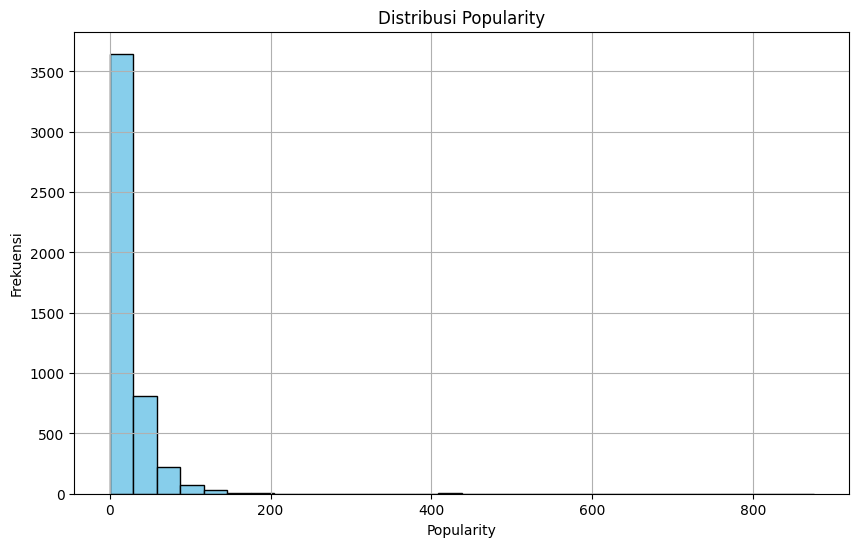

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['popularity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frekuensi')
plt.grid(True)  # Menambahkan grid untuk mempermudah membaca
plt.show()

In [ ]:
# Normalisasi data

# min-max scaling
scaler_min_max = MinMaxScaler()

df_cleaned['popularity'] = scaler_min_max.fit_transform(df_cleaned[['popularity']])

In [ ]:

# Normalisasi data

# min-max scaling
scaler_min_max = MinMaxScaler()
df_cleaned['popularity Min-Max'] = scaler_min_max.fit_transform(df_cleaned[['popularity']])

In [ ]:
# decimal scaling
scaler_decimal = MaxAbsScaler()
df_cleaned['popularity Decimal'] = scaler_decimal.fit_transform(df_cleaned[['popularity']])

In [ ]:

scaler_zscore = StandardScaler()
df_cleaned['popularity Z-Score'] = scaler_zscore.fit_transform(df_cleaned[['popularity']])

# menampilkan nilai normalisasi
print("\nNormalized Values:")
print(df_cleaned[['popularity', 'popularity Min-Max', 'popularity Z-Score', 'popularity Decimal']].head())


Normalized Values:
   popularity  popularity Min-Max  popularity Z-Score  popularity Decimal
0    0.171815            0.171815            4.053183            0.171815
1    0.158846            0.158846            3.696258            0.158846
2    0.122635            0.122635            2.699638            0.122635
3    0.128272            0.128272            2.854798            0.128272
4    0.050169            0.050169            0.705198            0.050169
